### Show data

In [60]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # type: ignore
import plotly.graph_objects as go # type: ignore
from PIL import Image
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

In [61]:
df = pd.read_csv('data/salaries.csv')

In [62]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16494.000000,1.649400e+04,16494.000000,16494.000000
mean,2023.224991,1.637878e+05,149713.575725,32.044986
std,0.713405,3.406017e+05,68516.136918,46.260201
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.020000e+05,101517.500000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.873422e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [63]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M
5,2024,MI,FT,Data Science Manager,180000,USD,180000,US,0,US,M
6,2024,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,M
7,2024,SE,FT,Business Intelligence Engineer,115000,USD,115000,US,0,US,M
8,2024,SE,FT,Data Architect,80000,GBP,100000,GB,0,GB,M
9,2024,SE,FT,Data Architect,45000,GBP,56250,GB,0,GB,M


In [64]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Check and evaluate data

In [65]:
print("Mean Salary:", round(df["salary_in_usd"].mean()))
print("Median Salary:", round(df["salary_in_usd"].median()))
print("Highest Salary:", round(df["salary_in_usd"].max()))
print("Lowest Salary:", round(df["salary_in_usd"].min()))

Mean Salary: 149714
Median Salary: 141300
Highest Salary: 800000
Lowest Salary: 15000


In [66]:
df["salary_in_usd"].sort_values()[:5]

15896    15000
15599    15000
10760    15000
12971    15000
11021    15680
Name: salary_in_usd, dtype: int64

In [67]:
df["salary_in_usd"].sort_values(ascending = False)[:5]

2764    800000
3607    774000
7458    750000
7350    750000
4582    750000
Name: salary_in_usd, dtype: int64

In [68]:
df["job_title"].value_counts().head(10)

job_title
Data Engineer                3456
Data Scientist               3312
Data Analyst                 2428
Machine Learning Engineer    1703
Research Scientist            529
Data Architect                433
Applied Scientist             433
Analytics Engineer            431
Research Engineer             306
Data Science                  271
Name: count, dtype: int64

In [69]:
desired_job_titles = [
    'Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Research Scientist',
    'Data Architect', 'Applied Scientist', 'Analytics Engineer', 'Research Engineer', 'Data Science'
]
filtered_df = df[df['job_title'].isin(desired_job_titles)]
experience_mapping = {
    'EN': 1,
    'MI': 2,
    'SE': 3,
    'EX': 4
}
filtered_df['experience_level'] =filtered_df['experience_level'].map(experience_mapping)


/var/folders/hw/3fmvf1y96hv_gfj7yxwtz2n40000gn/T/ipykernel_963/580125633.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



Text(0.5, 1.0, '10 ngành nghề nhiều nhất trong data thể hiện theo cấp độ')

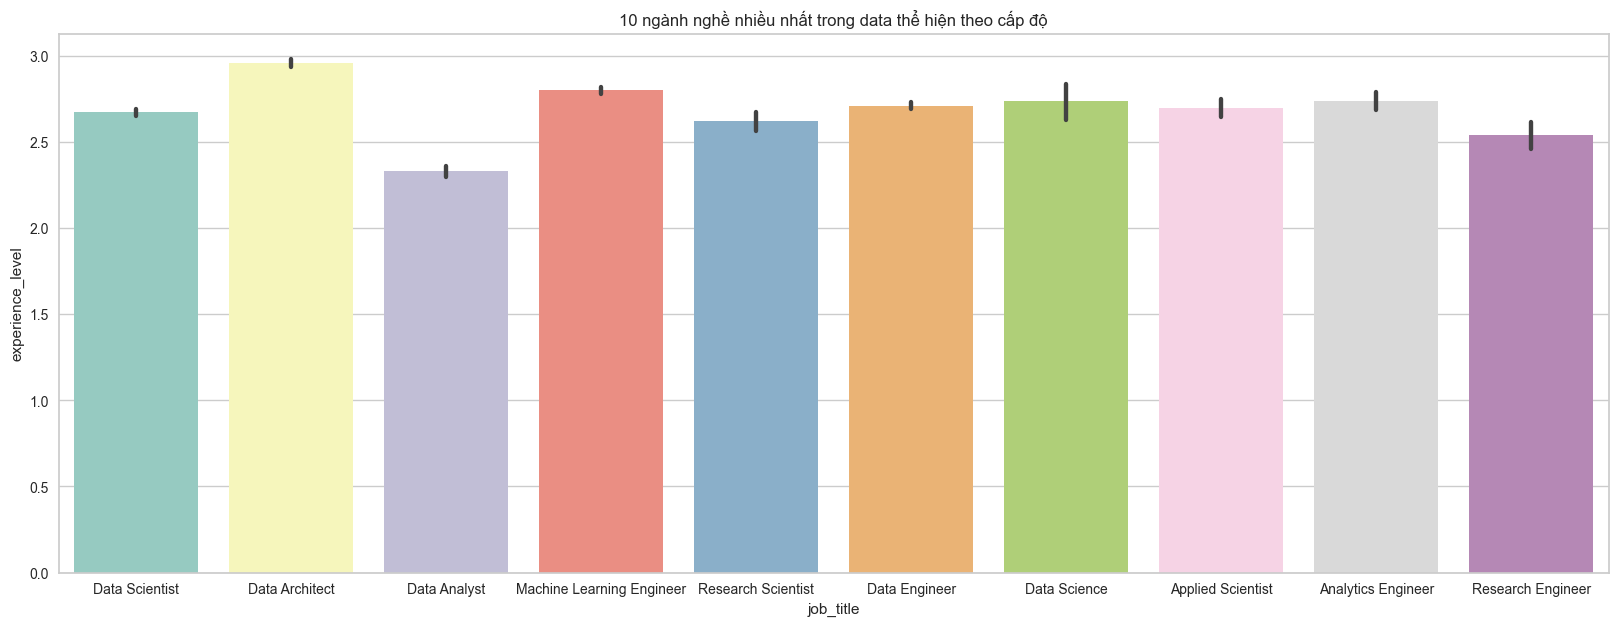

In [70]:
plt.figure(figsize = (20, 7))
sns.barplot(x = filtered_df["job_title"], y = filtered_df["experience_level"], palette = "Set3");
plt.title('10 ngành nghề nhiều nhất trong data thể hiện theo cấp độ')

Text(0.5, 1.0, 'Phân Phối Số Lượng Công Việc Theo 10 Lĩnh Vực AI hot nhất')

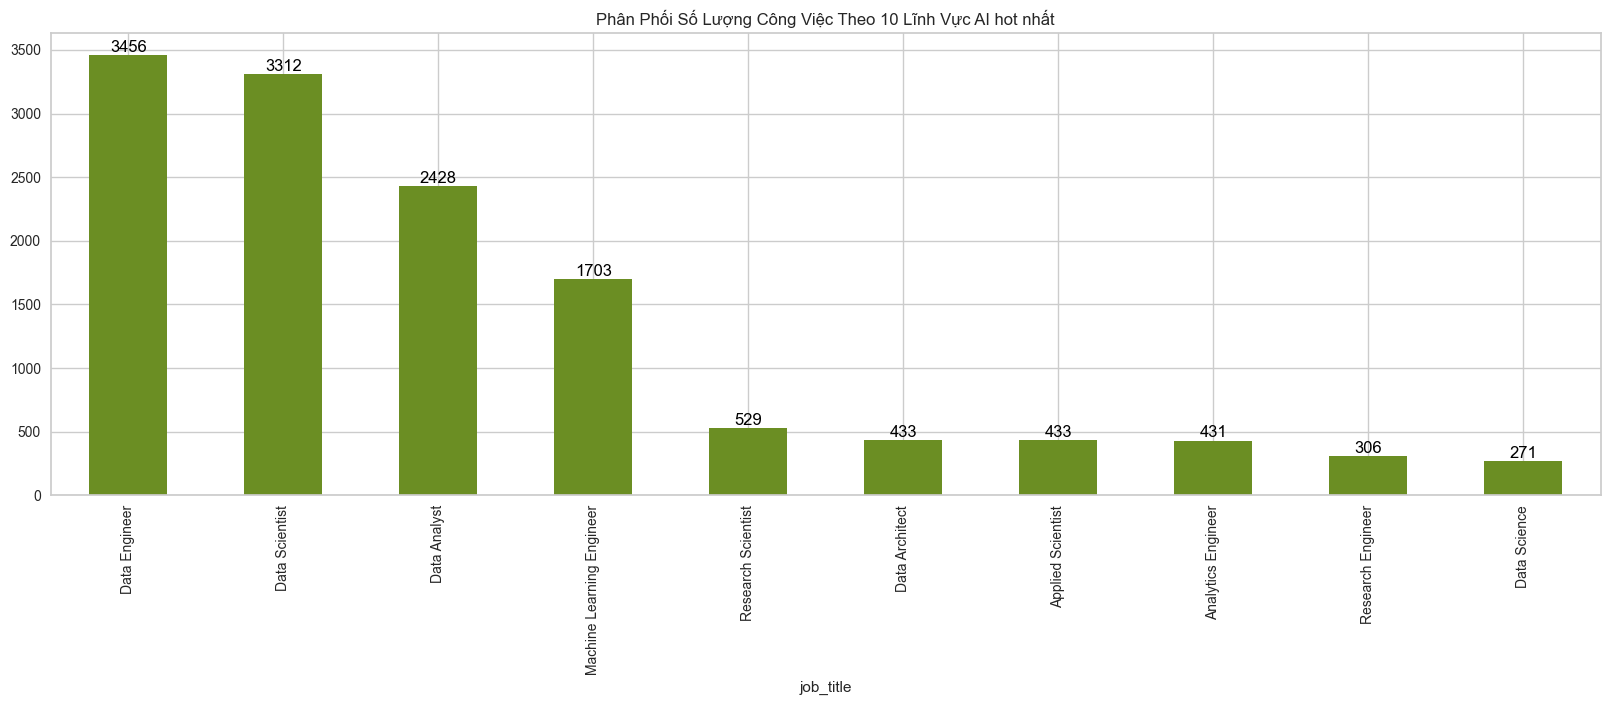

In [71]:
plt.figure(figsize = (20, 6))
ax = filtered_df.job_title.value_counts().plot(kind = 'bar', color = 'olivedrab')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
plt.title('Phân Phối Số Lượng Công Việc Theo 10 Lĩnh Vực AI hot nhất')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



Text(0.5, 1.0, 'Mức Lương Theo 10 Lĩnh Vực AI hot nhất')

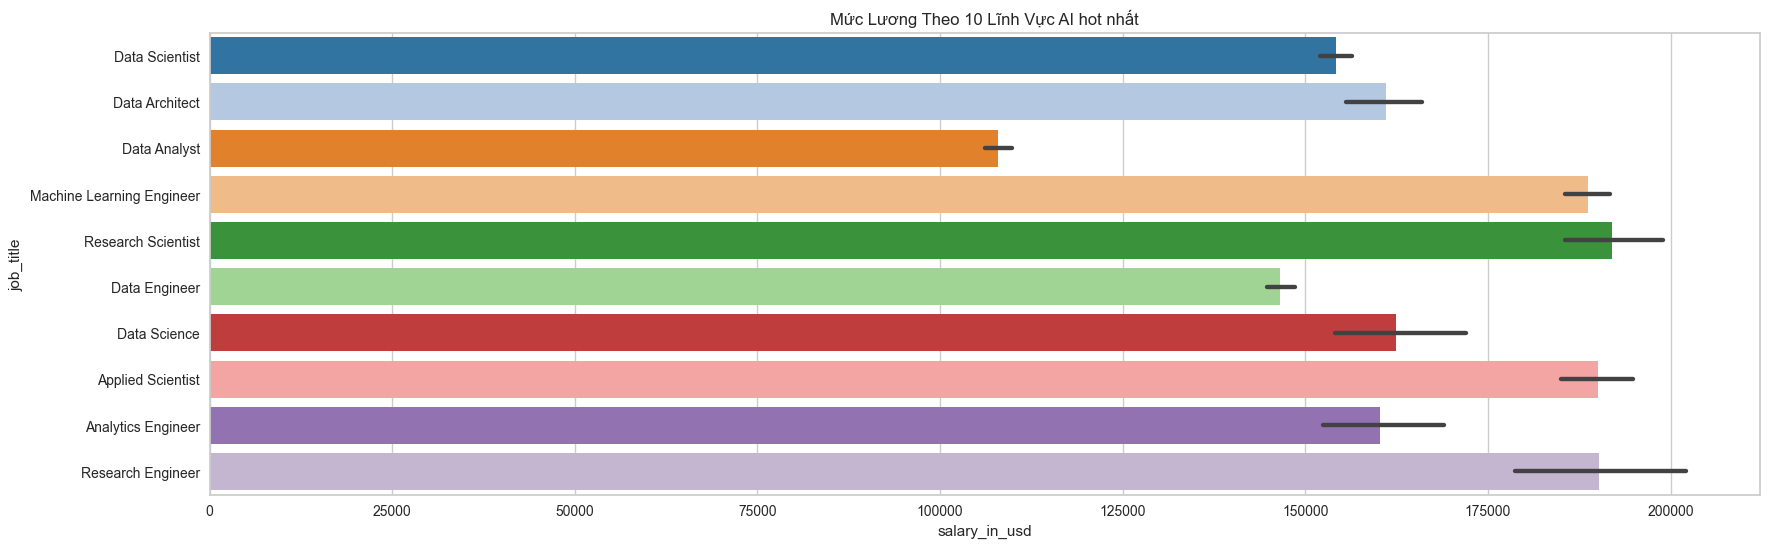

In [72]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = filtered_df["salary_in_usd"], y = filtered_df["job_title"], palette = "tab20");
plt.title('Mức Lương Theo 10 Lĩnh Vực AI hot nhất')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



Text(0.5, 1.0, 'Mức Lương Theo cấp độ ')

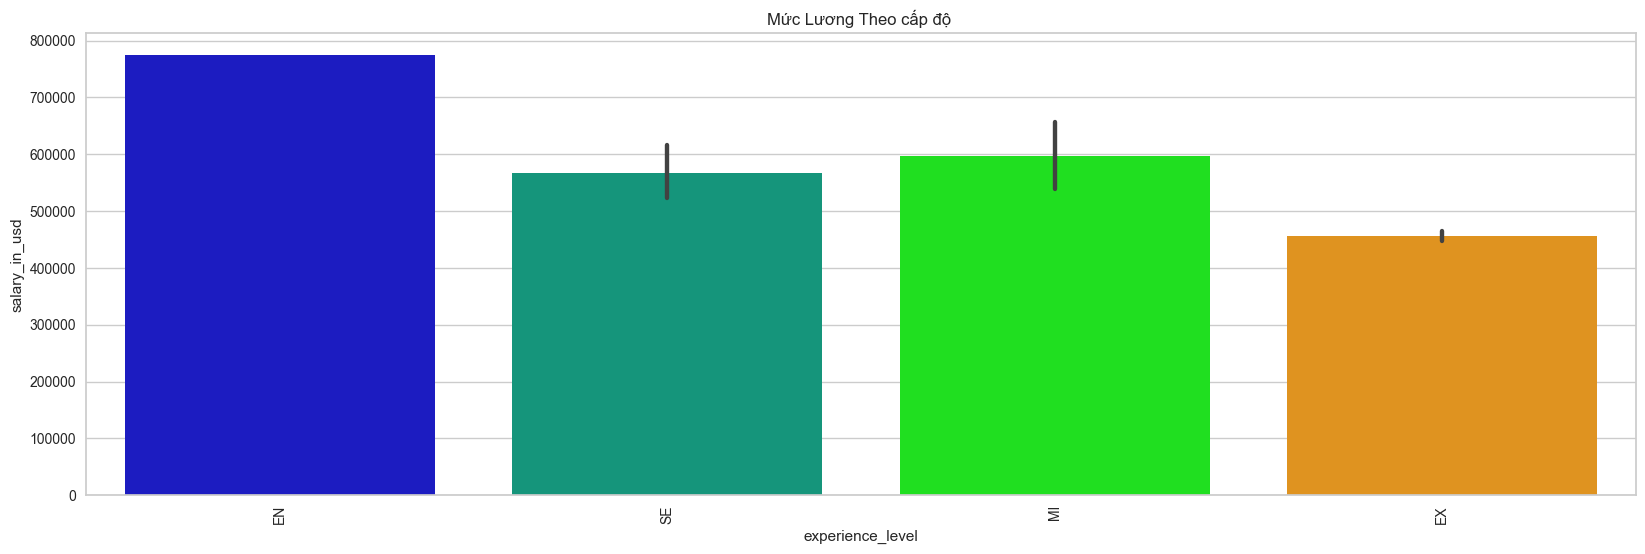

In [73]:
plt.figure(figsize = (20, 6))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("salary_in_usd", axis = 0, ascending = False, inplace = True)
sns.barplot(x = df["experience_level"][1:51],
            y = df["salary_in_usd"][1:51],
            palette = "nipy_spectral");
plt.title('Mức Lương Theo cấp độ ')

In [74]:
import nbformat
print(nbformat.__version__)

5.10.4


In [75]:
import plotly.express as px
df_numeric = df.select_dtypes(include=[np.number])

In [76]:
fig=px.imshow(df_numeric.corr(),text_auto=True,height=600,width=600,template='plotly',aspect='auto',title='<b>paiwise correlation of columns</b>')
fig.update_layout(title_x=0.5)
fig.show()

In [119]:
z=df['job_title'].value_counts().head(10)
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'job title','y':'count','text':'count'},template='ggplot2',title='<b> 10 vai trò hàng đầu trong AI')
fig.show()
fig=px.pie(z,names=z.index,values=z.values,labels={'index':'job title','y':'count','text':'count'},template='ggplot2')
fig.show()

In [120]:
fig=px.bar(df.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(10),x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'salary in usd'},text='salary_in_usd',template='seaborn',title='<b> Top 10 vai trò được trả lương cao nhất trong Lĩnh vực AI')
fig.show()

In [121]:
z=df.groupby('job_title',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False)
z['salary_in_usd']=round(z['salary_in_usd'],2)
fig=px.bar(z.head(10),x='job_title',y='salary_in_usd',color='job_title',labels={'job_title':'job title','salary_in_usd':'avg salary in usd'},text='salary_in_usd',template='seaborn',title='<b> 10 vai trò hàng đầu trong lĩnh vực AI dựa trên mức lương trung bình')
fig.update_traces(textfont_size=8)
fig.show()

In [122]:
fig=px.pie(df.groupby('experience_level',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='experience_level',values='salary_in_usd',color='experience_level',hole=0.7,labels={'experience_level':'Experience level ','salary_in_usd':'count'},template='ggplot2',title='<b>  Cấp độ kinh nghiệm về AI')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))

In [123]:
fig=px.pie(df.groupby('employment_type',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='employment_type',values='salary_in_usd',color='employment_type',hole=0.7,labels={'employment_type':'Employment level','salary_in_usd':'count'},template='seaborn',title='<b>  Cấp độ nhân viên trong lĩnh vực AI')
fig.update_layout(title_x=0.5)

In [124]:
px.histogram(df,x='salary_in_usd',marginal='rug',template='ggplot2',labels={'salary_in_usd':'Salary in USD'},title='<b> Phân phối lương')

In [125]:
px.violin(df,x='work_year',y='salary_in_usd',color='work_year',labels={'work_year':'year','salary_in_usd':'salary in usd'},template='seaborn',title='<b>Mức lương AI theo năm')

In [126]:
px.box(df,x='experience_level',y='salary_in_usd',color='experience_level',template='ggplot2',labels={'experience_level':'Experience Level','salary_in_usd':'salary in usd'},title='<b>Mức lương AI theo kinh nghiệm')

In [128]:
px.box(df,x='employment_type',y='salary_in_usd',color='employment_type',template='seaborn',labels={'employment_type':'Employment Type','salary_in_usd':'salary in usd'},title='<b> Mức lương AI theo loại nhân viên')

In [129]:
px.box(df,x='company_size',y='salary_in_usd',color='company_size',template='ggplot2',labels={'company_size':'Company Size','salary_in_usd':'salary in usd'},title='<b>Mức lương AI theo quy mô công ty')

In [130]:
px.bar(df.groupby('company_location',as_index=False)['experience_level'].count().sort_values(by='experience_level',ascending=False).head(15),x='company_location',y='experience_level',color_discrete_sequence=['magenta'],labels={'experience_level':'count'},template='plotly_dark',title='<b> Top 15 quốc gia có số việc làm AI cao nhất')

In [131]:
fig=px.treemap(df,path=[px.Constant('Job Roles'),'job_title','company_location','experience_level'],hover_name='job_title',template='ggplot2',title='<b>Sơ đồ dạng cây về các vai trò khác nhau trong AI với Cấp độ Kinh nghiệm')
fig.update_traces(root_color='lightgrey')

### Data show

In [89]:
df = df.drop(['employee_residence','remote_ratio'],axis='columns')


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16494 entries, 2764 to 15599
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         16494 non-null  int64 
 1   experience_level  16494 non-null  object
 2   employment_type   16494 non-null  object
 3   job_title         16494 non-null  object
 4   salary            16494 non-null  int64 
 5   salary_currency   16494 non-null  object
 6   salary_in_usd     16494 non-null  int64 
 7   company_location  16494 non-null  object
 8   company_size      16494 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.3+ MB


In [91]:
df.describe()

,work_year,salary,salary_in_usd
count,16494.000000,1.649400e+04,16494.000000
mean,2023.224991,1.637878e+05,149713.575725
std,0.713405,3.406017e+05,68516.136918
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,1.020000e+05,101517.500000
50%,2023.000000,1.422000e+05,141300.000000
75%,2024.000000,1.873422e+05,185900.000000
max,2024.000000,3.040000e+07,800000.000000


In [92]:
df.isna().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

In [93]:
df['experience_level'].value_counts()

experience_level
SE    10652
MI     4024
EN     1319
EX      499
Name: count, dtype: int64

In [94]:
df['employment_type'].value_counts()

employment_type
FT    16414
PT       38
CT       28
FL       14
Name: count, dtype: int64

In [95]:
df['job_title'].value_counts()

job_title
Data Engineer                      3456
Data Scientist                     3312
Data Analyst                       2428
Machine Learning Engineer          1703
Research Scientist                  529
                                   ... 
Marketing Data Scientist              1
Cloud Data Architect                  1
Staff Machine Learning Engineer       1
Big Data Developer                    1
Principal Data Architect              1
Name: count, Length: 155, dtype: int64

In [96]:
df['salary_currency'].value_counts()

salary_currency
USD    15254
GBP      616
EUR      449
CAD       56
INR       55
AUD       12
CHF        8
PLN        7
SGD        6
BRL        5
DKK        4
JPY        4
HUF        3
TRY        3
NOK        2
ILS        2
THB        2
HKD        1
NZD        1
CLP        1
ZAR        1
MXN        1
PHP        1
Name: count, dtype: int64

In [97]:
df['company_location'].value_counts()

company_location
US    14478
GB      694
CA      455
ES      133
DE      105
      ...  
IR        1
CN        1
MU        1
QA        1
EC        1
Name: count, Length: 77, dtype: int64

### Create train data

In [98]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'company_location',
       'company_size'],
      dtype='object')

In [99]:
# df['salary_in_usd'] = df['salary_in_usd'] /1000

In [100]:
X = df[['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'company_location',
       'company_size']]
Y = df['salary_in_usd']

In [101]:
X

,work_year,experience_level,employment_type,job_title,salary,salary_currency,company_location,company_size
2764,2024,MI,FT,AI Architect,800000,USD,CA,M
3607,2024,EN,FT,Data Analyst,774000,USD,MX,M
7458,2023,SE,FT,Data Scientist,750000,USD,US,M
7350,2023,MI,FT,Data Engineer,750000,USD,US,M
4582,2024,MI,FT,Machine Learning Scientist,750000,USD,US,M
...,...,...,...,...,...,...,...,...
11021,2023,MI,FT,Data Analyst,866000,PHP,PH,L
15896,2022,EN,FT,Data Analyst,15000,USD,ID,L
10760,2022,MI,FT,Business Intelligence Developer,15000,USD,GH,M
12971,2020,EX,FT,Staff Data Analyst,15000,USD,CA,M


### Encode categorical data

In [102]:
from sklearn.compose import ColumnTransformer # type: ignore
from sklearn.preprocessing import OneHotEncoder # type: ignore

In [103]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
ohetransform_1 = ohe.fit_transform(X[['salary_currency','employment_type','job_title']])
ohetransform_1

,salary_currency_AUD,salary_currency_BRL,salary_currency_CAD,salary_currency_CHF,salary_currency_CLP,salary_currency_DKK,salary_currency_EUR,salary_currency_GBP,salary_currency_HKD,salary_currency_HUF,...,job_title_Research Analyst,job_title_Research Engineer,job_title_Research Scientist,job_title_Robotics Engineer,job_title_Robotics Software Engineer,job_title_Sales Data Analyst,job_title_Software Data Engineer,job_title_Staff Data Analyst,job_title_Staff Data Scientist,job_title_Staff Machine Learning Engineer
2764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [104]:
ohetransform_2 = ohe.fit_transform(X[['experience_level','company_location','company_size']])
ohetransform_2

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,company_location_AD,company_location_AE,company_location_AM,company_location_AR,company_location_AS,company_location_AT,...,company_location_SI,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_location_ZA,company_size_L,company_size_M,company_size_S
2764,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3607,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7458,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7350,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4582,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11021,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15896,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10760,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12971,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [105]:
transformed_X = pd.concat([X['work_year'],ohetransform_1,X['salary'],ohetransform_2],axis=1)
transformed_X

,work_year,salary_currency_AUD,salary_currency_BRL,salary_currency_CAD,salary_currency_CHF,salary_currency_CLP,salary_currency_DKK,salary_currency_EUR,salary_currency_GBP,salary_currency_HKD,...,company_location_SI,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_location_ZA,company_size_L,company_size_M,company_size_S
2764,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3607,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7458,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7350,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4582,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11021,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15896,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10760,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12971,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Splitting the dataset

In [106]:

from sklearn.model_selection import train_test_split # type: ignore

X_train, X_test, y_train, y_test = train_test_split(transformed_X, Y, test_size= 0.2, random_state= 100)

### Training model

In [107]:
from sklearn.ensemble import RandomForestRegressor # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.ensemble import VotingRegressor # type: ignore
from sklearn.tree import DecisionTreeRegressor # type: ignore
from sklearn.ensemble import GradientBoostingRegressor # type: ignore
from sklearn.metrics import mean_squared_error # type: ignore

dt_model = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [108]:
ensemble_model = VotingRegressor([('dt',dt_model),('rf', rf_model), ('lr', lr_model),('gb',gb_model)])

In [109]:
ensemble_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = ensemble_model.predict(X_test)

In [110]:
y_pred = ensemble_model.predict(X_test)
y_pred

array([171475.17409419, 152296.38415381, 167836.85710815, ...,
       172769.00253258,  63459.63902634, 197482.94848184])

### Evaluate model

In [111]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score # type: ignore

In [112]:
# hiệu suất của mô hình
ensemble_model.score(X_train,y_train)

0.9529779291530867

In [113]:
# sai số bình phương trung bình giữa giá trị dự đoán và giá trị thực tế 
mse = mean_squared_error(y_test, y_pred)
mse

5.774574417892423e+18

In [114]:
# sai số trung bình tuyệt đối 
mae = mean_absolute_error(y_test,y_pred)
mae

105737606.03157708

In [115]:
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

2403034418.7906303

In [116]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

NameError: name 'model' is not defined

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


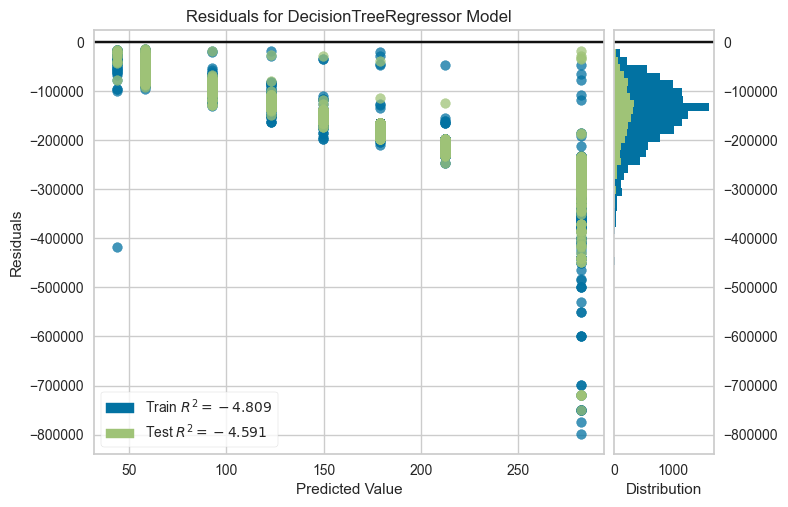

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()